<a href="https://colab.research.google.com/github/Maitreyeej/Global_Suicides_Number_Prediction/blob/main/Suicide_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and Creating a Dataframe**

In [ ]:
from sklearn.preprocessing import StandardScaler        #Import modules for modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd             #Basic module import
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/CODING_DOJO/suicide.csv'
Suicide_df=pd.read_csv(filename) 
Suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
Suicide_df.info()       #Basic info for the data available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
Suicide_df.describe()    #Basic description of parameters

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
Suicide_df['age'].value_counts()          # checking number of age groups

35-54 years    4642
55-74 years    4642
15-24 years    4642
25-34 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [ ]:
Suicide_df['generation'].value_counts()         

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [ ]:
Suicide_df=Suicide_df.drop(columns=['country-year', 'HDI for year'])

In [ ]:
Suicide_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [ ]:
Suicide_df.rename(columns = {' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace = True)

In [ ]:
Suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_for_year ($)    27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
Suicide_df_1=Suicide_df[Suicide_df['year']<2014]

In [ ]:
Suicide_df_1

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27803,Uzbekistan,2013,female,35-54 years,99,3547895,2.79,"57,690,453,461",2150,Generation X
27804,Uzbekistan,2013,female,75+ years,8,345180,2.32,"57,690,453,461",2150,Silent
27805,Uzbekistan,2013,male,5-14 years,61,2720938,2.24,"57,690,453,461",2150,Generation Z
27806,Uzbekistan,2013,female,55-74 years,21,1356298,1.55,"57,690,453,461",2150,Boomers


In [ ]:
Suicide_df.groupby(['country'])['population'].sum() 

country
Albania                   62325467
Antigua and Barbuda        1990228
Argentina               1035985431
Armenia                   77348173
Aruba                      1259677
                           ...    
United Arab Emirates      36502275
United Kingdom          1738767780
United States           8054027201
Uruguay                   84068943
Uzbekistan               486422532
Name: population, Length: 101, dtype: int64

In [ ]:
Suicide_sex=Suicide_df.groupby(['sex'])['suicides_no'].sum()

In [ ]:
Suicide_population=Suicide_df_1.groupby(['year'])['population'].sum()

In [ ]:
Suicide_gdp=Suicide_df_1.groupby(['year'])['gdp_per_capita ($)'].mean()

In [ ]:
pivot_age = Suicide_df_1.pivot_table(columns=['age'], index=['year'], values=['suicides/100k pop'], aggfunc=np.sum)

In [ ]:
pivot_population=Suicide_df_1.pivot_table(columns=['age'], index=['year'], values=['population'], aggfunc=np.sum) 

In [ ]:
Suicide_capita=Suicide_df_1.groupby(['gdp_per_capita ($)'])['suicides/100k pop'].mean()

Text(0.5, 1.0, 'Box Plot for Mean number of suicides as per Age Group')

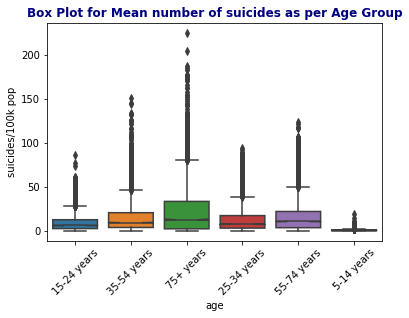

In [ ]:
ax=sns.boxplot(x='age', y='suicides/100k pop', data=Suicide_df_1, notch=True);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45); 
ax.set_title('Box Plot for Mean number of suicides as per Age Group', fontweight='bold', c='navy')

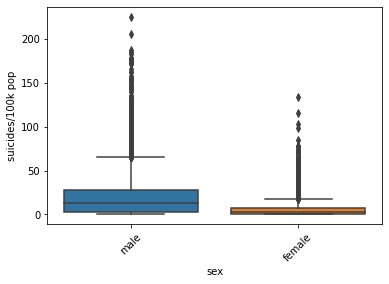

In [ ]:
ax=sns.boxplot(x='sex', y='suicides/100k pop', data=Suicide_df_1, notch=False);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Text(0.5, 1.0, 'Effect of GDP_per_capita on number of suicides')

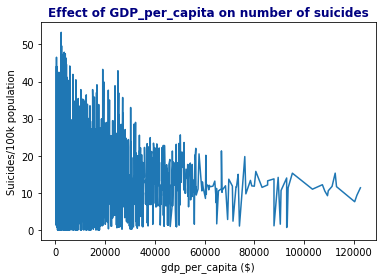

In [ ]:
Suicide_capita.plot()
plt.ylabel('Suicides/100k population')
plt.title('Effect of GDP_per_capita on number of suicides', fontweight='bold', c='navy')

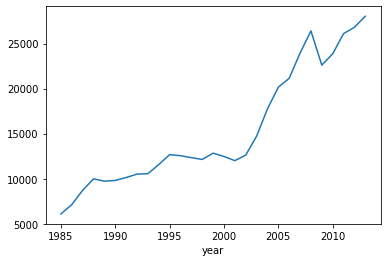

In [ ]:
Suicide_gdp.plot()

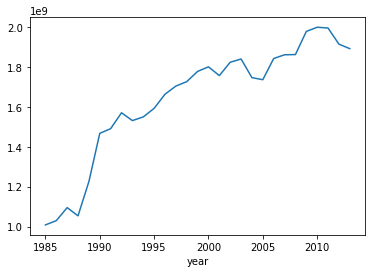

In [ ]:
Suicide_population.plot();

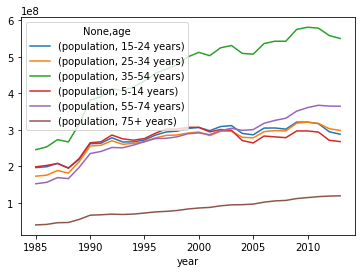

In [ ]:
pivot_population.plot()

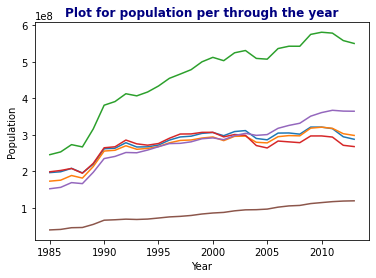

In [ ]:
plt.plot(pivot_population)
plt.title('Plot for population per through the year', fontweight='bold', c='navy')
plt.xlabel('Year')
plt.ylabel('Population');

In [ ]:
pivot_age

suicides/100k pop                                                         
age        15-24 years 25-34 years 35-54 years 5-14 years 55-74 years 75+ years
year                                                                           
1985            809.25      960.84     1190.69      51.56     1449.06   2350.49
1986            782.60     1017.01     1122.76      40.46     1340.64   2276.37
1987            808.69     1183.72     1337.43      52.36     1614.15   2549.10
1988            857.59     1216.19     1291.25      46.79     1552.62   2508.69
1989            952.69     1266.53     1412.79      57.56     1664.04   2682.93
1990           1166.74     1581.93     1788.83      67.08     2004.55   3269.62
1991           1267.92     1598.91     1862.26      72.74     2103.82   3415.41
1992           1194.25     1644.40     2023.98      75.77     2222.71   3367.77
1993           1213.03     1715.82     2104.55     100.93     2244.18   3411.78
1994           1290.33     1700.02     2190.51      85.00     2345.88   3872.05
1995           1618.73     2294.15     2896.41      94.11     3047.45   4709.41
1996           1620.38     2225.89     2831.15     113.25     3025.02   4326.52
1997           1656.99     2189.66     2718.52      98.66     2896.37   4257.63
1998           1614.62     2241.75     2824.65     115.29     3017.51   4336.90
1999           1748.36     2386.64     2890.01     109.02     3052.64   4287.24
2000           1624.15     2366.19     2828.26      91.58     3015.38   4461.89
2001           1618.72     2325.57     2892.34     105.19     3060.17   4274.22
2002           1640.38     2283.04     2791.34     110.28     3013.61   4389.07
2003           1551.87     2144.21     2765.27     105.72     2990.77   4069.74
2004           1461.05     2000.72     2522.20     102.64     2702.56   3792.63
2005           1388.19     1970.14     2410.15     118.89     2657.75   3619.87
2006           1450.09     1864.05     2390.74      99.33     2488.25   3873.55
2007           1419.76     2058.83     2364.54     111.15     2486.65   3969.22
2008           1426.23     1914.94     2452.07     105.20     2551.85   3695.55
2009           1429.18     1957.17     2506.18     106.44     2597.12   3579.95
2010           1403.38     1906.23     2398.29     114.20     2436.90   3584.99
2011           1447.76     1827.21     2286.93     109.68     2367.78   3328.48
2012           1363.60     1737.66     2214.23     104.12     2325.46   3356.84
2013           1309.45     1728.82     2119.91     105.57     2297.64   3102.25

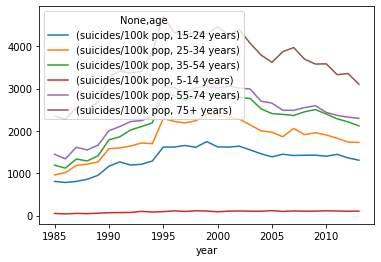

In [ ]:
pivot_age.plot()

Number of suicides has been surprisingly decreasing. And as expected, there are no suicides for the ages 5-14.

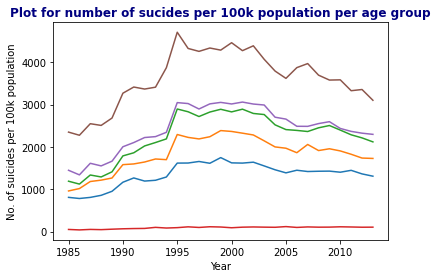

In [ ]:
plt.plot(pivot_age)
plt.title('Plot for number of sucides per 100k population per age group', fontweight='bold', c='navy')
plt.xlabel('Year')
plt.ylabel('No. of suicides per 100k population');

In [ ]:
Suicide_df.groupby(['country'])['suicides_no'].sum()

country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64

In [ ]:
Suicide_sex_pop=Suicide_df_1.groupby(['sex'])['population'].sum()

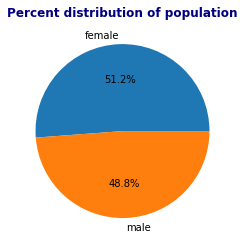

In [ ]:
Pie_Sex_pop=Suicide_sex_pop.values
Pie_Sex_label_pop= Suicide_sex_pop.index
temp=Pie_Sex_pop.sum()

for ele in Pie_Sex_pop:
   ele=ele/temp*100

plt.title('Percent distribution of population', c='navy', fontweight='bold')
plt.pie(Pie_Sex_pop, autopct='%1.1f%%', labels= Pie_Sex_label_pop);

In [ ]:
Suicide_sex

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

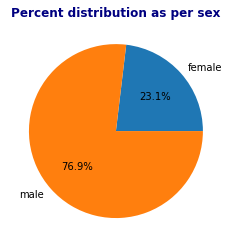

In [ ]:
     #Plotting a pie chart with the share of sales as per the location
Pie_Sex=Suicide_sex.values
Pie_Sex_label= Suicide_sex.index
temp=Pie_Sex.sum()

for ele in Pie_Sex:
   ele=ele/temp*100

plt.title('Percent distribution as per sex', c='navy', fontweight='bold')
plt.pie(Pie_Sex, autopct='%1.1f%%', labels= Pie_Sex_label);

It is usually said that there is higher tendancy of suicide in males than in females. After analysing this data, we can see that the number of male suicides is almost more than three times that of females.

In [ ]:
#Remove ',' from gdp_for_year 
def nochar (s):
 
    s_counts=s.count(',')
    s=list(s)

    while s_counts:
       s.remove(',')
       s_counts-=1

    s = '' . join(s)
    s=int(s)
    return s

Suicide_df['gdp_for_year ($)']=Suicide_df['gdp_for_year ($)'].apply(nochar)

In [ ]:
Suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [ ]:
Suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_for_year ($)    27820 non-null  int64  
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


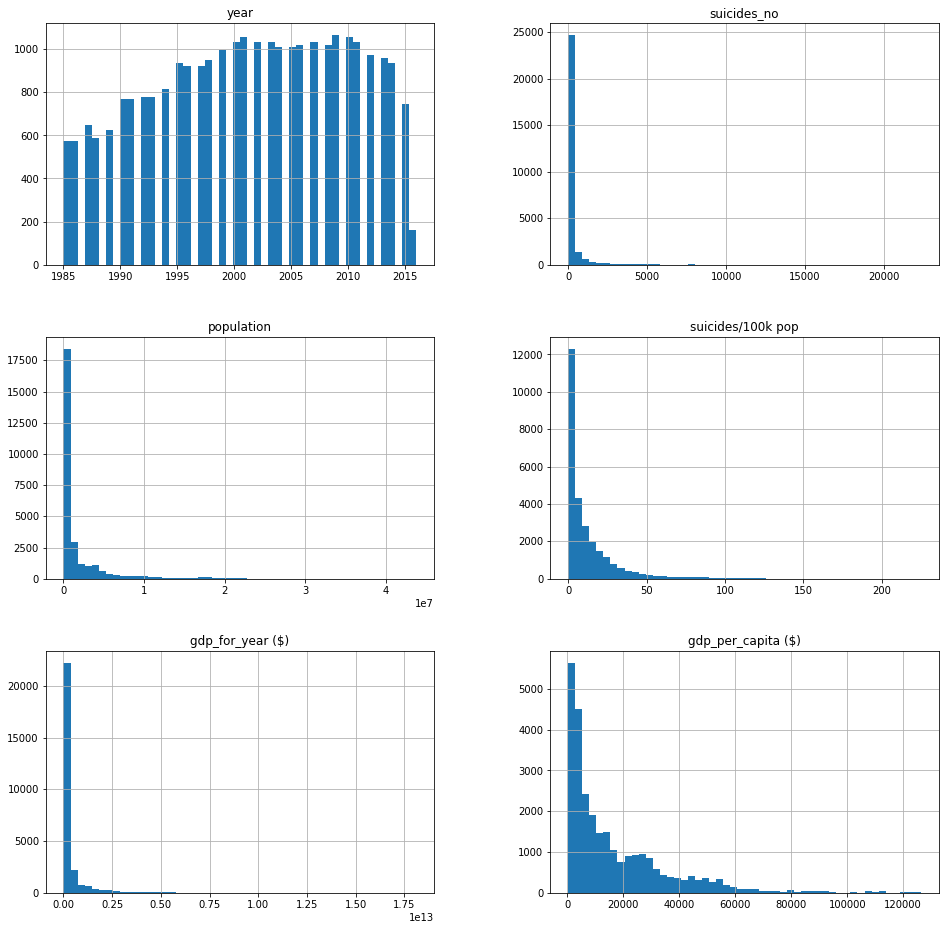

In [ ]:
Suicide_df.loc[:,:].hist(bins=50,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10');

In [ ]:
Suicide_df.corr().sort_values(by = ['suicides/100k pop']) 

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.094529,0.339134
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.303405,1.000000
population,0.008850,0.616162,1.000000,0.008285,0.710697,0.081510
gdp_for_year ($),0.094529,0.430096,0.710697,0.025240,1.000000,0.303405
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.430096,0.061330
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.025240,0.001785


AttributeError: ignored

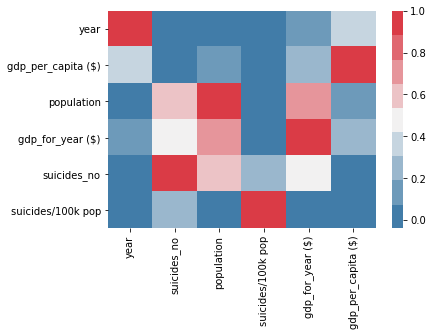

In [ ]:
sns.heatmap(Suicide_df.corr().sort_values(by = ['suicides/100k pop']), cmap = sns.diverging_palette(240, 10, n=9)); 
sns.set_title('Correlation Matrix for numerical columns', fontweight='bold', c='navy')

In [ ]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, [y_train.mean()]*len(y_train)))) 

Training RMSE: 19.167583038306216


In [ ]:
y_train.mean()

12.951510392609723

In [ ]:
Suicide_df_1

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27803,Uzbekistan,2013,female,35-54 years,99,3547895,2.79,"57,690,453,461",2150,Generation X
27804,Uzbekistan,2013,female,75+ years,8,345180,2.32,"57,690,453,461",2150,Silent
27805,Uzbekistan,2013,male,5-14 years,61,2720938,2.24,"57,690,453,461",2150,Generation Z
27806,Uzbekistan,2013,female,55-74 years,21,1356298,1.55,"57,690,453,461",2150,Boomers


we will get rid of column country as it will be represented by gdp and population. Suicides_no is represented by suicides/100k population. This gives us more absolute density of suicides which is more comparable betweeen countries.

In [ ]:
Suicide_data=Suicide_df_1.drop(columns=['country', 'suicides_no', 'gdp_for_year ($)', 'generation'])

In [ ]:
Suicide_data

,year,sex,age,population,suicides/100k pop,gdp_per_capita ($)
0,1987,male,15-24 years,312900,6.71,796
1,1987,male,35-54 years,308000,5.19,796
2,1987,female,15-24 years,289700,4.83,796
3,1987,male,75+ years,21800,4.59,796
4,1987,male,25-34 years,274300,3.28,796
...,...,...,...,...,...,...
27803,2013,female,35-54 years,3547895,2.79,2150
27804,2013,female,75+ years,345180,2.32,2150
27805,2013,male,5-14 years,2720938,2.24,2150
27806,2013,female,55-74 years,1356298,1.55,2150


In [ ]:
ohe = pd.get_dummies(Suicide_data, columns = ['sex', 'age'], drop_first = True)
ohe.head()

,year,population,suicides/100k pop,gdp_per_capita ($),sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,1987,312900,6.71,796,1,0,0,0,0,0
1,1987,308000,5.19,796,1,0,1,0,0,0
2,1987,289700,4.83,796,0,0,0,0,0,0
3,1987,21800,4.59,796,1,0,0,0,0,1
4,1987,274300,3.28,796,1,1,0,0,0,0


In [ ]:
X_t=ohe.drop(columns='suicides/100k pop')

In [ ]:
X=ohe.drop(columns='suicides/100k pop').values

In [ ]:
y=ohe['suicides/100k pop']

In [ ]:
X.shape

(25980, 9)

In [ ]:
y.shape

(25980,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) 

In [ ]:
scaler = StandardScaler()           #standardising the data
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

# Linear Regression

In [ ]:
LinReg=LinearRegression(fit_intercept=True)

In [ ]:
LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_ln=LinReg.predict(X_test)

In [ ]:
score = LinReg.score(X_test, y_test)
print("Linear Regression R2 score is", score)
print("RMSE for Linear Regression", np.sqrt(mean_squared_error(y_test, y_pred_ln)))

Linear Regression R2 score is 0.29178963879367803
RMSE for Linear Regression 16.1966562160495


# KNN Regression Model

In [ ]:
#KNN Regressor model

In [ ]:
scaler = StandardScaler()           #standardising the data
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [ ]:
Reg = KNeighborsRegressor(n_neighbors= 3)     #creating an instant of KNeighborRegressor class
Reg.fit(X_train_sc,y_train)          #Creating a model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
y_pred_knn=Reg.predict(X_test_sc)    #Calculating the predicted values
y_pred_knn

array([ 1.50666667, 52.48      , 15.87      , ..., 10.89666667,
        0.85      ,  0.89666667])

In [ ]:
score = Reg.score(X_test_sc, y_test)
print("KNN Regression R2 score is", score)
print("RMSE for KNN Regression", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN Regression R2 score is 0.36388594523687834
RMSE for KNN Regression 15.350118116463355


# **Random Forest Regression**

In [ ]:
clf = RandomForestRegressor(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_rf=clf.predict(X_test)

In [ ]:
score = clf.score(X_test, y_test)
print("Random Forest Regression R2 score is", score)
print("RMSE for Random Forest Regression", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regression R2 score is 0.717334128577308
RMSE for Random Forest Regression 10.232480221167398


In [ ]:
score = clf.score(X_train, y_train)
print("Random Forest Regression R2 score is", score)
print("RMSE for Random Forest Regression", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regression R2 score is 0.9571501956596629
RMSE for Random Forest Regression 10.232480221167398


In [ ]:
from sklearn.model_selection import GridSearchCV    #Thanks Noelle for the insight
params = {'n_estimators': [10, 50, 100, 200],
          'max_depth': [None, 2, 3, 4, 5],
          'min_samples_split': [2, 3],
          'min_samples_leaf': [1, 2]}

#Fit the grid search
gs = GridSearchCV(RandomForestRegressor(), param_grid = params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
y_pred_rfgs=gs.predict(X_test)
score = gs.score(X_test, y_test)
print("Random Forest Regression R2 score is", score)
print("RMSE for Random Forest Regression", np.sqrt(mean_squared_error(y_test, y_pred_rfgs)))

Random Forest Regression R2 score is 0.7098341427453494
RMSE for Random Forest Regression 10.36734093220312


# **Bagged Tree Regression**



In [ ]:
clf1= BaggingRegressor(n_estimators=50,
                             bootstrap=True,
                             oob_score=True)

In [ ]:
clf1.fit(X_train, y_train)
y_pred_bt=clf1.predict(X_test)

In [ ]:
score = clf1.score(X_test, y_test)

In [ ]:
print("Bagged Tree Regression R2 score is", score)
print("RMSE for Bagged Tree Regression", np.sqrt(mean_squared_error(y_test, y_pred_bt)))

Bagged Tree Regression R2 score is 0.7127584773182682
RMSE for Bagged Tree Regression 10.314966839306852


# Feature Importance

In [ ]:
clf.feature_importances_.shape

(9,)

In [ ]:
X_t.columns.values.shape

(9,)

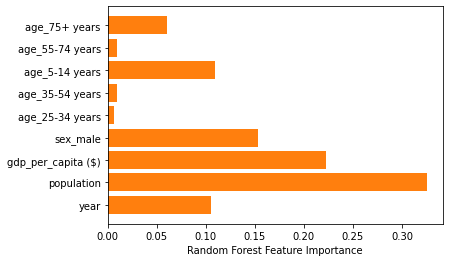

In [ ]:
plt.barh(X_t.columns.values, clf.feature_importances_)     #Thanks to https://towardsdatascience.com/the-3-ways-to-compute-feature-importance-in-the-random-forest-96c86b49e6d4
#plt.figure(figsize=(20, 5))  # width:20, height:3

sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_t.columns.values[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1]
input_shape

9

In [ ]:
# Sequential model
model = Sequential()

In [ ]:
# First hidden layer
model.add(Dense(4, # How many neurons you have in your first hidden layer
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dropout(.2))
 #Second hidden layer
model.add(Dense(2, activation = 'relu'))

model.add(Dropout(.2))

In [ ]:
# Output layer
model.add(Dense(1, activation = 'linear'))



In [ ]:
# Step 2: Compile
model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['acc'])


In [ ]:
# Step 3: Fit our model
history = model.fit(X_train_sc, y_train,
                    validation_data = (X_test_sc, y_test), 
                    epochs=20)

Epoch 1/20
609/609 [==============================] - 3s 3ms/step - loss: 528.1344 - acc: 0.1372 - val_loss: 521.1531 - val_acc: 0.0011
Epoch 2/20
609/609 [==============================] - 1s 2ms/step - loss: 513.6025 - acc: 0.0011 - val_loss: 507.4442 - val_acc: 0.0011
Epoch 3/20
609/609 [==============================] - 1s 2ms/step - loss: 500.2296 - acc: 0.0011 - val_loss: 494.6248 - val_acc: 0.0011
Epoch 4/20
609/609 [==============================] - 1s 2ms/step - loss: 487.7015 - acc: 0.0011 - val_loss: 482.6040 - val_acc: 0.0011
Epoch 5/20
609/609 [==============================] - 1s 2ms/step - loss: 475.9651 - acc: 0.0011 - val_loss: 471.3483 - val_acc: 0.0011
Epoch 6/20
609/609 [==============================] - 1s 2ms/step - loss: 465.0044 - acc: 0.0011 - val_loss: 460.8835 - val_acc: 0.0011
Epoch 7/20
609/609 [==============================] - 1s 2ms/step - loss: 454.7559 - acc: 0.0011 - val_loss: 451.0583 - val_acc: 0.0011
Epoch 8/20
609/609 [============================

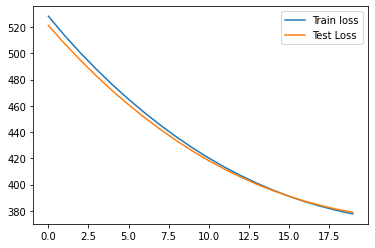

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

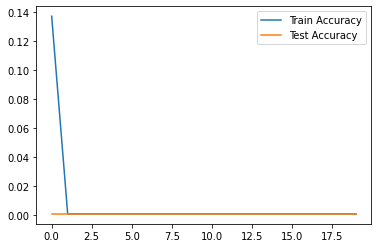

In [ ]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();